# Stack Overflow Survey (2019 - 2023)

The goal of this project is to provide valuable insightson the most popular programming languages and emerging technological trends.

In [2]:
# Import the needed python libraries

import requests # for making HTTP requests
import json # parse JSON strings into Python dictionaries
import pandas as pd # data structures and functions needed to manipulate structured data
import time # built-in time module
from datetime import datetime # for working with dates and times
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt # interface for making plots and charts
import matplotlib.ticker as ticker # to set the x-ticks to only full years and format them as integers.
from bs4 import BeautifulSoup # for parsing HTML and XML documents

I downloaded the yearly data from a Stack Overflow Survey from 2019 to 2023 and I keep only the Id, the known languages and the languages users want to learn in the future. I add a column with the year for each df and then merge them into dfsurvey

In [3]:
# Specify the columns you want to import for each year
columns_2019 = ["Respondent", "LanguageWorkedWith", "LanguageDesireNextYear"]
columns_2020 = ["Respondent", "LanguageWorkedWith", "LanguageDesireNextYear"]
columns_2021 = ["ResponseId", "LanguageHaveWorkedWith", "LanguageWantToWorkWith"]
columns_2022 = ["ResponseId", "LanguageHaveWorkedWith", "LanguageWantToWorkWith"]
columns_2023 = ["ResponseId", "LanguageHaveWorkedWith", "LanguageWantToWorkWith"]

# Load the survey data for each year into separate DataFrames
df2019 = pd.read_csv("C:/Users/lluis/Desktop/Documents/IronHack/Week3/Stack_Overflow_DA/2019_survey_results_public.csv", usecols=columns_2019)
df2020 = pd.read_csv("C:/Users/lluis/Desktop/Documents/IronHack/Week3/Stack_Overflow_DA/2020_survey_results_public.csv", usecols=columns_2020)
df2021 = pd.read_csv("C:/Users/lluis/Desktop/Documents/IronHack/Week3/Stack_Overflow_DA/2021_survey_results_public.csv", usecols=columns_2021)
df2022 = pd.read_csv("C:/Users/lluis/Desktop/Documents/IronHack/Week3/Stack_Overflow_DA/2022_survey_results_public.csv", usecols=columns_2022)
df2023 = pd.read_csv("C:/Users/lluis/Desktop/Documents/IronHack/Week3/Stack_Overflow_DA/2023_survey_results_public.csv", usecols=columns_2023)

# Rename the columns so they match
df2019.columns = ["UsedId", "Languages Known", "Languages Pending"]
df2020.columns = ["UsedId", "Languages Known", "Languages Pending"]
df2021.columns = ["UsedId", "Languages Known", "Languages Pending"]
df2022.columns = ["UsedId", "Languages Known", "Languages Pending"]
df2023.columns = ["UsedId", "Languages Known", "Languages Pending"]

# Add a 'Year' column to each DataFrame
df2019["Year"] = 2019
df2020["Year"] = 2020
df2021["Year"] = 2021
df2022["Year"] = 2022
df2023["Year"] = 2023

# Concatenate the DataFrames
dfsurvey = pd.concat([df2019, df2020, df2021, df2022, df2023])

I create a list with the most used languages and create a function to check if the language is either in the "Languages Known" column and the "Languages Pending" column. Then I add a column for each of the languages and fill it depending on if the language is known or pending to learn.

In [4]:
# List of programming languages
languages_survey = ["JavaScript", "HTML/C", "Python", "SQL", "TypeScript", "Java", "C#", "C++", "C", "PHP"]

# Function to check if a language appears in the "Languages Known" and/or "Languages Pending" columns
def check_language(row, language):
    if pd.notna(row["Languages Known"]) and language in row["Languages Known"]:
        return 'Yes'
    elif pd.notna(row["Languages Pending"]) and language in row["Languages Pending"]:
        return "WantTo"
    else:
        return "No"

# Add new columns to the DataFrame for each of the most popular programming languages
for language in languages_survey:
    dfsurvey[language] = dfsurvey.apply(check_language, args=(language,), axis=1)
# args=(language,) is a tuple containing the arguments to pass to check_language
# axis=1 applied to each row

# Survey Data Collection

With the data collected from the yearly survey we create a pivot table with years as column and each language and its 3 possible variables as rows

In [5]:
# Initialize an empty DataFrame for the pivot table
pivot_table = pd.DataFrame(index=languages_survey, columns=pd.MultiIndex.from_product([dfsurvey['Year'].unique(), ['Yes', 'No', 'WantTo']], names=['Year', 'Status']))

# Fill the pivot table
for year in dfsurvey['Year'].unique():
    for language in languages_survey:
        pivot_table.loc[language, (year, 'Yes')] = len(dfsurvey[(dfsurvey[language] == 'Yes') & (dfsurvey['Year'] == year)])
        pivot_table.loc[language, (year, 'No')] = len(dfsurvey[(dfsurvey[language] == 'No') & (dfsurvey['Year'] == year)])
        pivot_table.loc[language, (year, 'WantTo')] = len(dfsurvey[(dfsurvey[language] == 'WantTo') & (dfsurvey['Year'] == year)])

In [6]:
# Display the pivot table
print(pivot_table)

Year         2019                 2020                 2021                \
Status        Yes     No WantTo    Yes     No WantTo    Yes     No WantTo   
JavaScript  59219  24480   5184  26188  22090  16183  53587  25808   4044   
HTML/C      55466  31258   2159  20771  26865  16825  46259  35669   1511   
Python      36443  39078  13362  26682  29350   8429  39792  35710   7937   
SQL         47544  38242   3097  19970  30856  13635  38835  41984   2620   
TypeScript  18523  60179  10181  17150  42519   4792  24909  49742   8788   
Java        70113  14795   3975  31671  15924  16866  62371  17761   3307   
C#          27097  57483   4303  13674  43508   7279  22984  56697   3758   
C++         20524  62178   6181   9756  46952   7753  20057  58009   5373   
C           71988  13519   3376  33645  15753  15063  64021  16459   2959   
PHP         23030  63563   2290   7106  47939   9416  18130  63753   1556   

Year         2022                 2023                
Status        Yes   

In [7]:
pivot_table.to_csv('Survey_Data.csv', index=True)

We display the graphic

C:\Users\lluis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lluis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lluis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lluis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

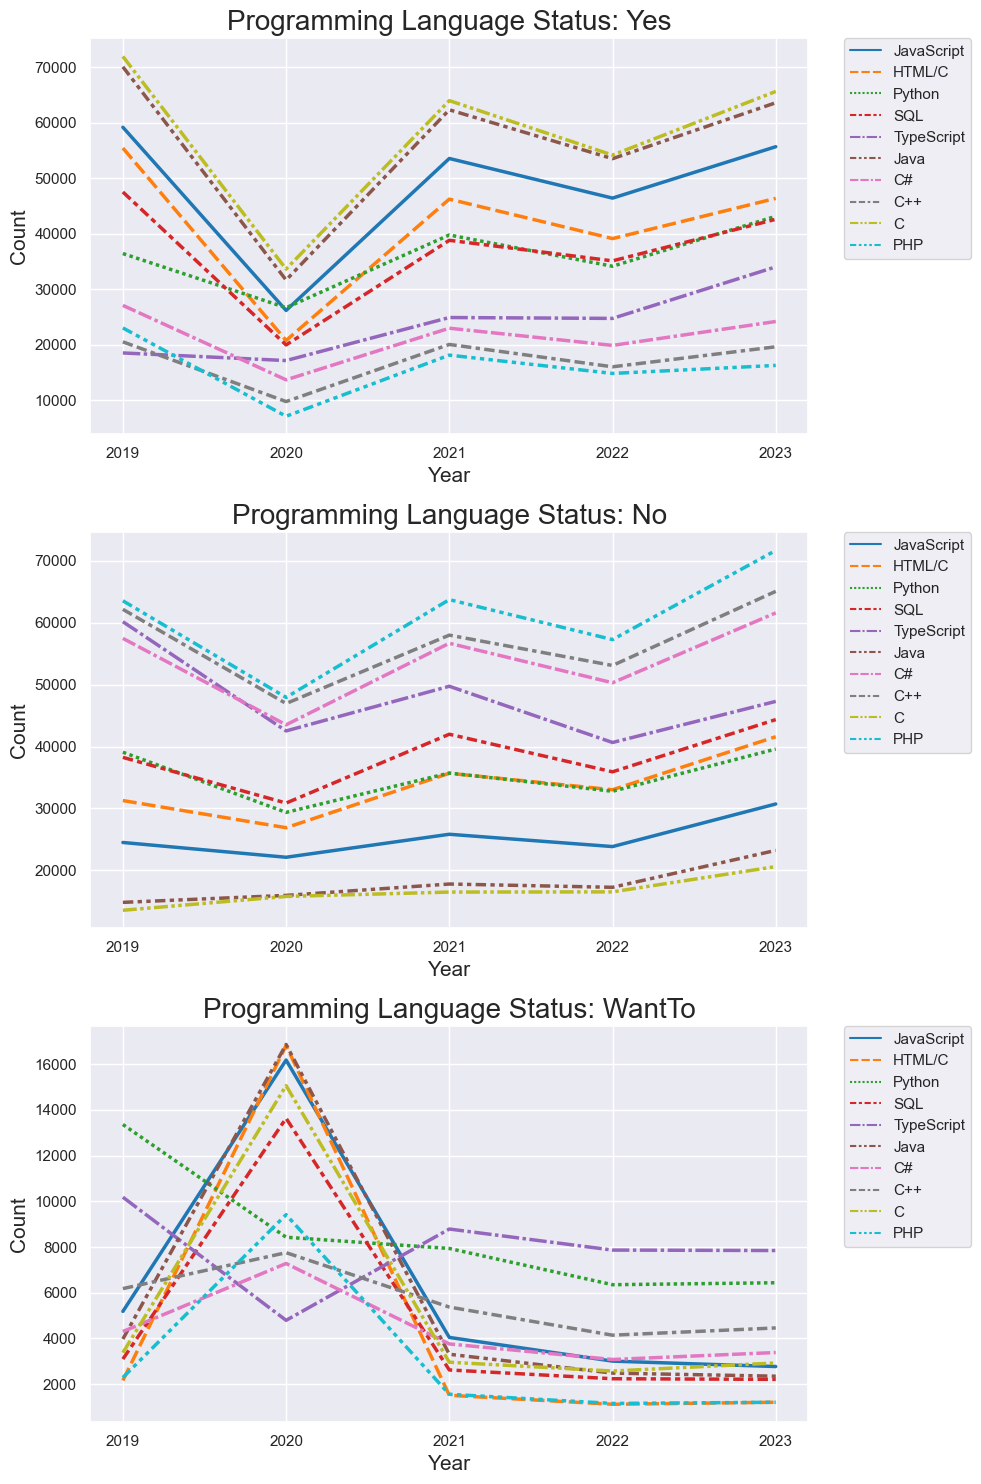

In [6]:
# Set seaborn theme
sns.set_theme(style="darkgrid")

# Define the statuses
statuses = ['Yes', 'No', 'WantTo']

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Loop over the statuses
for i, status in enumerate(statuses):
    # Select the data for the status
    data = pivot_table.xs(status, level='Status', axis=1)
    
    # Convert the data to numeric and fill missing values with 0
    data = data.apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # Create a line plot
    sns.lineplot(data=data.T, ax=axs[i], palette='tab10', linewidth=2.5)
    
    # Set the title and labels with larger fonts
    axs[i].set_title(f'Programming Language Status: {status}', fontsize=20)
    axs[i].set_ylabel('Count', fontsize=15)
    axs[i].set_xlabel('Year', fontsize=15)
    
    # Set x-ticks to only full years and format them as integers
    axs[i].xaxis.set_major_locator(ticker.MultipleLocator(1))
    axs[i].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    
    # Move the legend outside the plot
    axs[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the plots
plt.tight_layout()
plt.show()